# Will Machines Replace Music Critics? Measuring the Effectivity of Different Machine-Learning Models for Predicting Music Popularity
## Project Contributers: Samuel Clear, Diwas Dahal, Michael Yinka-Oke

In [15]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns
import string
import sklearn as sk
import xgboost
from scipy.stats import ranksums
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRFClassifier
from numpy import mean, std

# Project Idea
### What machine learning models are the most effective at determining popularity in Spotify songs?

# Project Pitch:
What makes a Spotify song popular? There have been countless observations and trends given over the years by researchers and reporters alike for the changing of music, such as popular songs in the past 30 years decreasing in the number of male singers and happy songs, followed by an increase in sad, relaxed, and danceable songs to reach the Top 100 list from the Official Charts Company in the UK (Interiano et al, 2018). According to ratings from pieces from the US Billboard Top 100, aggressive percussive backing tracks and bright-toned music have declined over the past 10 years, while energetic guitar-based music has increased over the past 20 years and continues to increase (Mauch et al, 2015). Each of these aspects of music over the years have been fundamental to distinguishing which genre different songs fit into, but different genres of music evolve and morph into different subgenres, fitting in with the times and contrasting with them. But what trends might we see in popularity if we remove songs and pieces from their respective genres, instead grouping them based on their danceability and tone? What underlying features can we identify as the most impactful in terms of popularity for the most popular music streaming app on the market, Spotify?

# Prior Research: 

Music has been studied by many different sources and fields of study over the past 50 years, with people asking after the rise of new trends and musicians what makes them so popular. Each of these research papers contributed to by Mauch (2015), Interiano (2018), and their colleagues investigate the patterns in changes of tone and energy in different pieces, as well as certain aspects of the pieces that sold the most copies. The paper from Mauch on song trends in the US is majorly based on audio features interpreted from lyrics, pitch, and rhythm, rather than scores given by fans on a website, like for the paper from Interiano. Mauch’s report also includes linear trend and clustering models similar to the models we plan to use, but without the machine learning implements we plan to employ. Interiano’s paper applies Linear Regression and Random Forest classification models to determine the relationships between different features and popularity. 
Additionally, there have been many different research documents focused on predicting the popularity of songs based on data collected by Spotify. To name a few research projects based on this data on Kaggle, there is the “Popularity Prediction XGBoost & Regression Analysis” notebook from Hossein Faridnasr, which evaluates the XGBoost prediction model for its effectivity on predicting the popularity of songs hidden in the test set. However, similar to other Notebooks present for this specific dataset, there isn’t a large amount of correlation between each of the features present in correlation matrices for the data, except the following feature pairings: acoustics, energy, and loudness; danceability and valance (Faridnasr, 2023). This indicates that reducing the dimensionality of the data, if not possible with Principal Component Analysis, K-means clustering, or another form of unsupervised learning to narrow down the features, may require some clever feature engineering to evaluate relationships in song popularity.
Our current research into past projects of Spotify song popularity is sparse, but we plan to expand this knowledge base as we continue inspecting the data and exploring different possible models we can use to collect our results. 


# About the data:
This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with the song, such as its duration in milliseconds, tempo in beats-per-minute, and liveness from 0 to 1. More features are listed below.

**Feature Description, Data Collection, Cleaning, and Exploration Plan:**
`track_id:` The Spotify ID for the track (song on an album).
`artists:` The artists' names who performed the track. If there is more than one artist, they are separated by a “;” symbol.
`album_name:` The album name in which the track appears.
`track_name:` The name of the track.
`popularity:` A track's popularity is between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, for the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated.independently. Artist and album popularity is derived mathematically from track popularity.
`duration_ms:` The track length in milliseconds.
`explicit:` Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown).
`danceability:` Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable and 1.0 is the most danceable.
`energy:` Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
`key:` The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
`loudness:` The overall loudness of a track in decibels (dB).
`mode:` Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
`speechiness:` Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
`acousticness:` A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
`instrumentalness:` Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentals value is to 1.0, the greater the likelihood the track contains no vocal content.
`liveness:` Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
`valence:` A measure from 0.0 to 1.0 describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
`tempo:` The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
`time_signature:` An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
`track_genre:` The genre in which the track belongs.

Not all of these features are present in both datasets. The features above are those present in the first dataset "song_data.csv".

The second dataset contains fewer overall features, 

# Data Cleaning

**Why?** 
We consider a song is popular if it's popularity determined by the number of time it was played is greater than 75, also if we want we can increase the number of popularity for better accuracy.

We have way too many data so we were not worried about not having enough data to work with so remove all the row that has any missing data. 

In [16]:
# Load data and drop unnecessary columns and rows with null values
data = pd.read_csv('data/song_data.csv').drop(columns=['track_id', 'key']).dropna(how='any')

# Remove duplicates based on track name
data = data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
data['duration_s'] = data['duration_ms'] / 1000
#data.drop(columns=['milliseconds'], inplace=True) # drops the old column


# More cleaning 


In [17]:
'''using the average we can make model like linear regression, decision tree, or forest'''

cleared_data = pd.read_csv('data/song_data.csv').drop(columns=['track_id']).dropna(how='any')

# Assuming 'popularity' column contains numerical values
cleared_data['popularity'] = cleared_data['popularity'].apply(lambda x: 1 if x > 75 else 0)

# Convert True to 1 and False to 0 in the "popularity" column
cleared_data['explicit'] = cleared_data['explicit'].astype(int)

# Remove duplicates based on track name
cleared_data = cleared_data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
cleared_data['duration_s'] = cleared_data['duration_ms'] / 1000

# List of columns you want to keep
columns_data = ['popularity', 'duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
columns_targets = ['duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filtering columns
cleared_data = cleared_data[columns_data]

# Filter data with "popularity" greater than 75
popular_songs = data[data['popularity'] > 75]

## Under-sampling the negative class for the data, picking from equal portions of the data throughout.
print(f"Positive Class: {len(cleared_data[cleared_data['popularity'] == 1])}, Negative Class: {len(cleared_data[cleared_data['popularity'] == 0])}")
floor_divisor = len(cleared_data[cleared_data['popularity'] == 0]) // len(cleared_data[cleared_data['popularity'] == 1])
current_new_data = []
for i in range(len(cleared_data[cleared_data["popularity"] == 1])):
    current_new_data.append(cleared_data[cleared_data['popularity'] == 0].iloc[(i * floor_divisor)])
print(current_new_data)
undersampled_dataframe = pd.DataFrame(data=current_new_data, columns=columns_data)
print(undersampled_dataframe)
all_data = undersampled_dataframe.append(cleared_data[cleared_data['popularity'] == 1])
print(f"New Positive Class Size: {len(all_data[all_data['popularity'] == 1])}, Negative Class Size: {len(all_data[all_data['popularity'] == 0])}")
print("Data should now be balanced, however a large amount of data was lost. We may decrease the minimum popularity score needed to be labeled \'popular\'.")

all_numeric_data = all_data.select_dtypes(include='number')

# Normalize the under-sampled data
norm_undersampled = (all_numeric_data - all_numeric_data.min()) / (all_numeric_data.max() - all_numeric_data.min())

# Standardization with standard deviation of all columns in the dataset?
stan_undersampled = (all_numeric_data - all_numeric_data.mean()) / all_numeric_data.std()

Positive Class: 886, Negative Class: 72722
[popularity            0.000000
duration_s          230.666000
explicit              0.000000
danceability          0.676000
energy                0.461000
loudness             -6.746000
speechiness           0.143000
acousticness          0.032200
instrumentalness      0.000001
liveness              0.358000
valence               0.715000
tempo                87.917000
time_signature        4.000000
Name: 0, dtype: float64, popularity            0.000000
duration_s          218.531000
explicit              0.000000
danceability          0.507000
energy                0.378000
loudness             -9.019000
speechiness           0.033200
acousticness          0.852000
instrumentalness      0.000212
liveness              0.093700
valence               0.085000
tempo               135.860000
time_signature        4.000000
Name: 111, dtype: float64, popularity            0.000000
duration_s          209.293000
explicit              0.000000
dance

/var/folders/wr/svzmgkks5q13hzsr_6sq82m40000gn/T/ipykernel_13311/2917106250.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = undersampled_dataframe.append(cleared_data[cleared_data['popularity'] == 1])


# Insights on Data

We made graphs to look at diffrent relationship between the date for better understanding. 

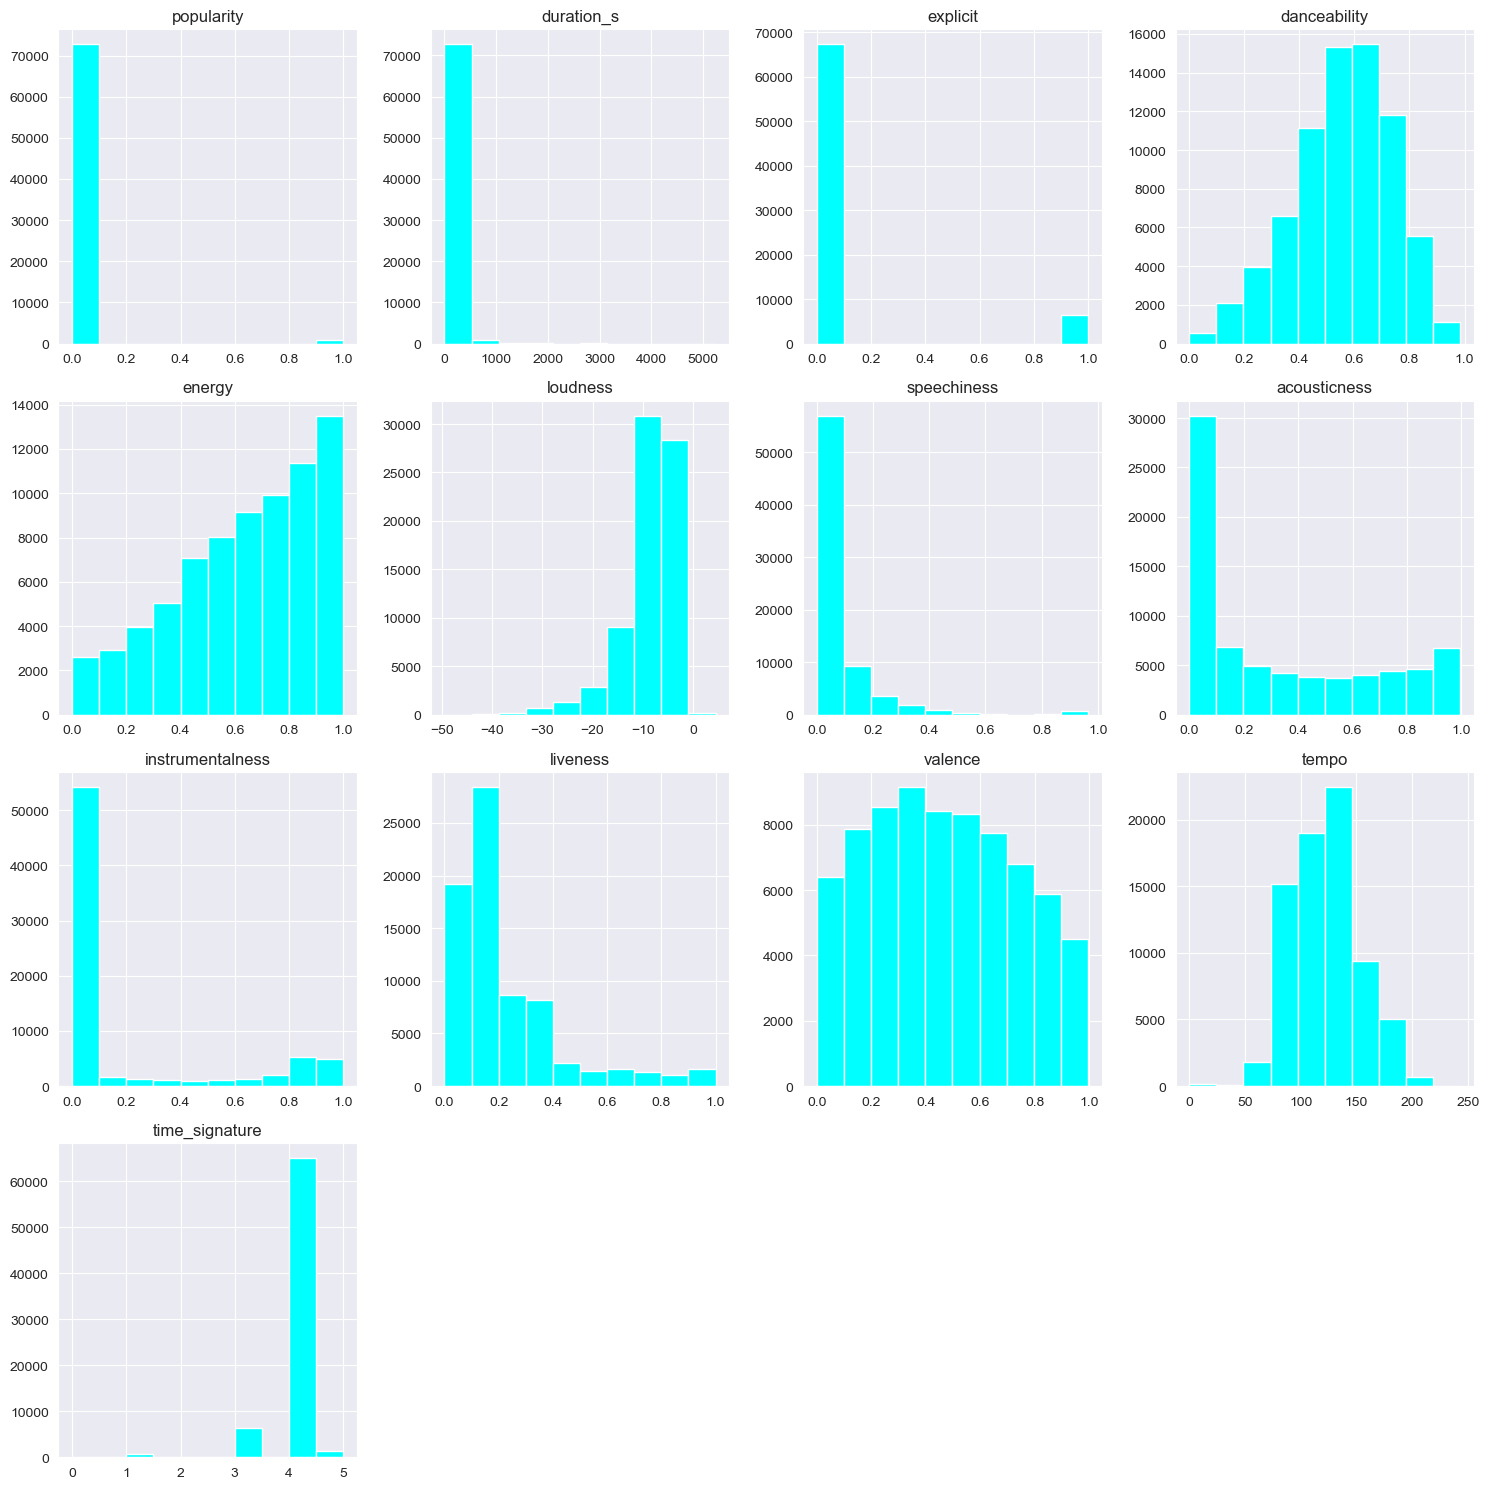

In [18]:
# histograms to analyze each audio feature
cleared_data.hist(figsize=(15, 15), color = 'cyan')
plt.tight_layout()
plt.show()

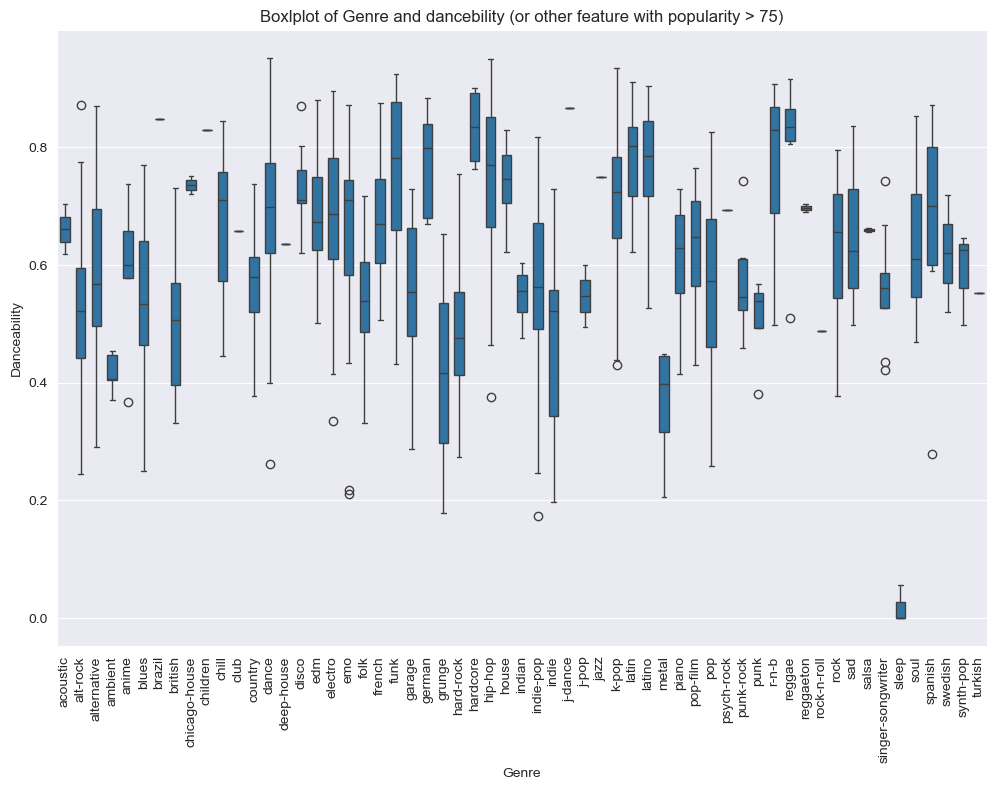

In [19]:
plt.figure(figsize=(12, 8))
    
sns.boxplot(data=popular_songs, x='track_genre', y='danceability', width=0.6)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Boxlplot of Genre and dancebility (or other feature with popularity > 75)')
plt.xticks(rotation=90)
plt.show()

/var/folders/wr/svzmgkks5q13hzsr_6sq82m40000gn/T/ipykernel_13311/3913481780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity, x='track_genre', y='popularity', order=sorted_genres, palette='rainbow')


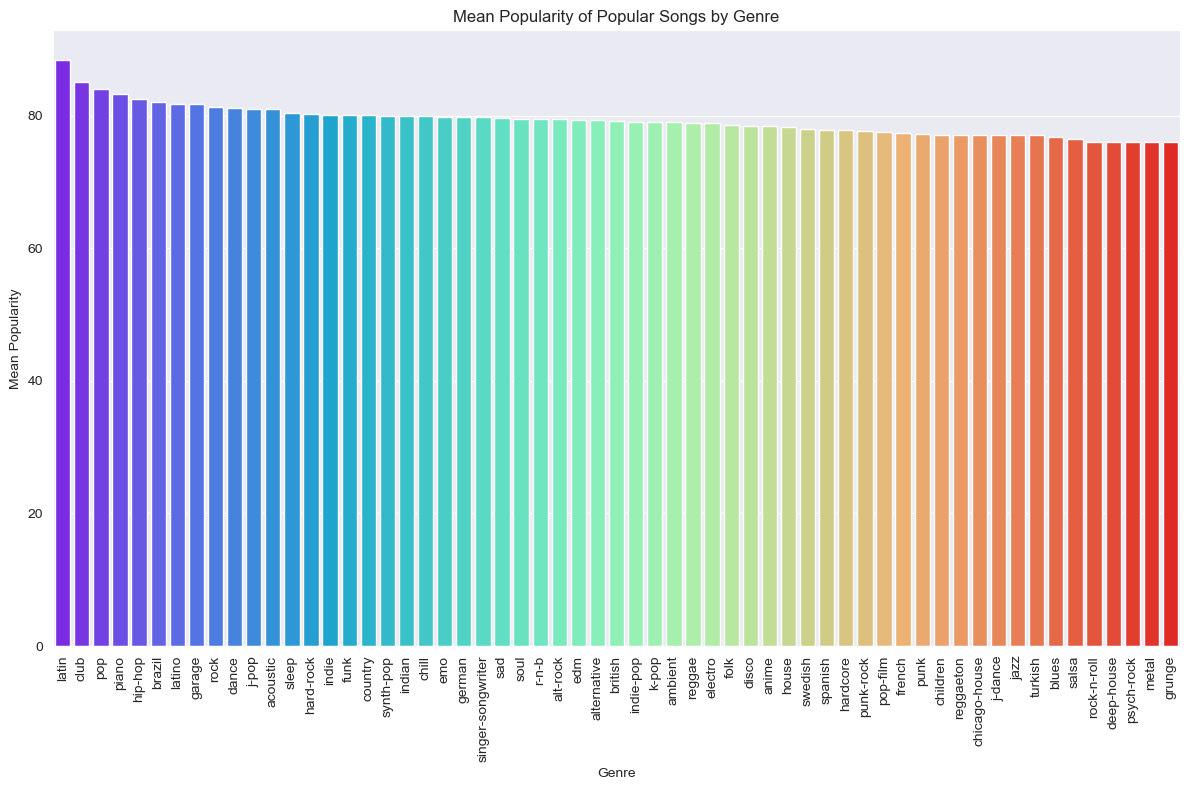

In [20]:
# Group by genre and calculate mean popularity
genre_popularity = popular_songs.groupby('track_genre')['popularity'].mean().reset_index()

# Sort genres by popularity
sorted_genres = genre_popularity.sort_values(by='popularity', ascending=False)['track_genre']

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_popularity, x='track_genre', y='popularity', order=sorted_genres, palette='rainbow')

plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity of Popular Songs by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

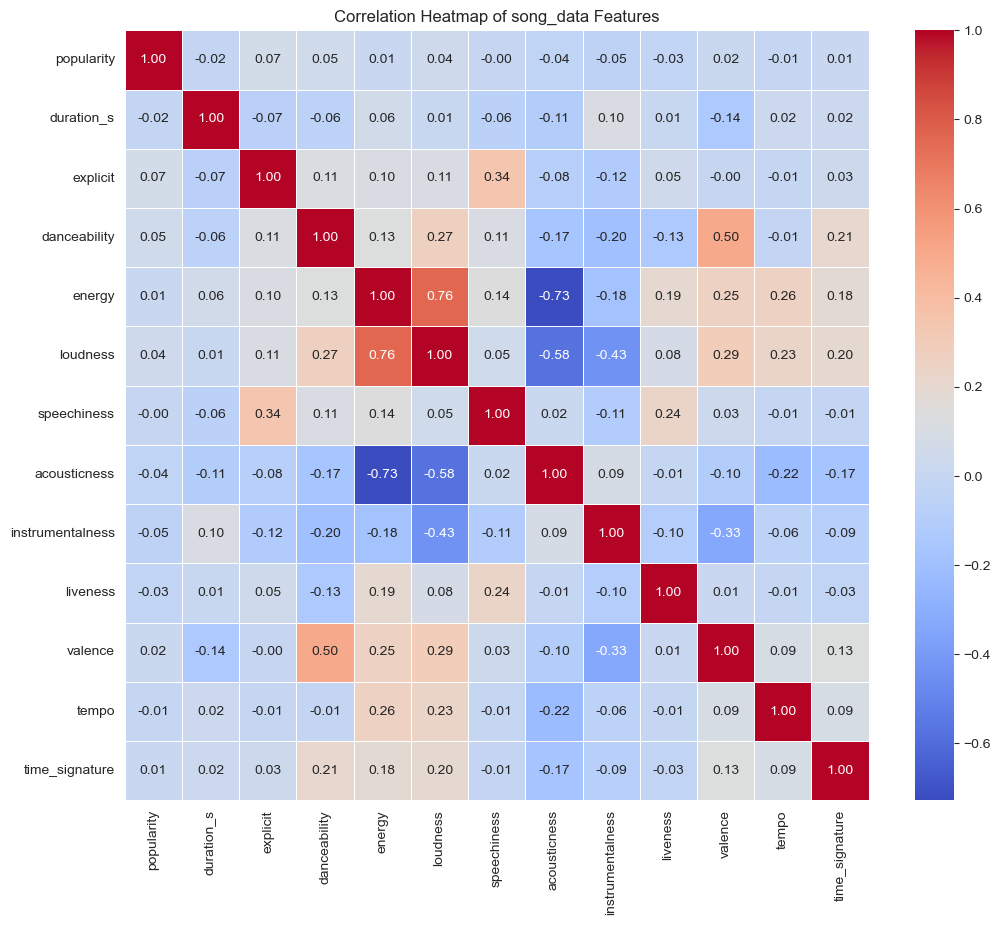

In [21]:
# Correlation heat map
# Drop unnecessary columns
columns_to_keep = ['popularity', 'duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'] # To remove each of the columns that aren't float/int64 values, along with the song index values
corr_data = cleared_data[columns_to_keep]
song_data_df = corr_data

# Calculate correlation matrix
correlation_matrix = song_data_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of song_data Features')
plt.show()

## SVM Classifier Model w/ Linear Kernel
This model applies the Support Vector Classifier, which gives us weights of support vectors for the strongest predictors of popularity in the dataset. 

Creating Classifiers...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Clas

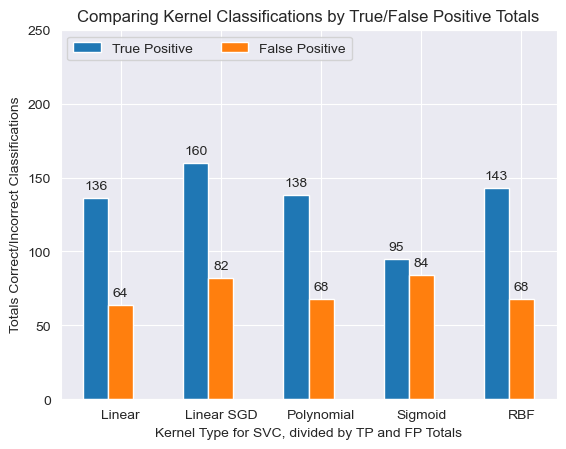

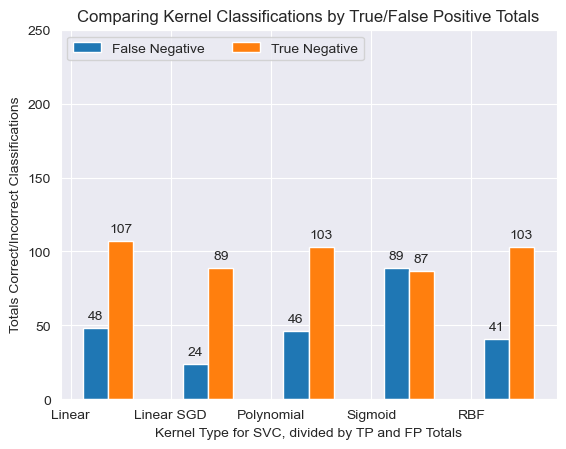

In [22]:
## SVM with Soft Margin (Allow for missclassification at a low cost, essential for our imperfect dataset)
# The very initial version of this file was constructed with the support of ChatGPT, but has been built
# up significantly since then.

# Generate noisy data
X = norm_undersampled[columns_targets]
y = norm_undersampled['popularity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Finding average accuracy values of each model, comparing the models
accuracies_linear = []
accuracies_sgd = []
accuracies_poly = []
accuracies_sigmoid = []
accuracies_rbf = []

# Create SVM classifier with soft-margin (C=1)
# Measure differences in SVM Accuracy by kernel
print("Creating Classifiers...")
svm_classifier_linear = SVC(kernel='linear', degree=3, C=1)
svm_classifier_sgd = SGDClassifier(max_iter=2500)
svm_classifier_poly = SVC(kernel='poly', degree=3, C=1)
svm_classifier_sigmoid = SVC(kernel='sigmoid', degree=3, C=1)
svm_classifier_rbf = SVC(degree=3, C=1)

# Process the data through each of these five models 10 times to calculate the true accuracy of the model
for _ in range(9):

    # Train the classifiers
    print("Training classifiers...")
    svm_classifier_linear.fit(X_train, y_train)
    svm_classifier_sgd.fit(X_train, y_train)
    svm_classifier_poly.fit(X_train, y_train)
    svm_classifier_sigmoid.fit(X_train, y_train)
    svm_classifier_rbf.fit(X_train, y_train)

    # Make predictions on test data
    print("Classifying unseen data based on trained classifiers...")
    y_pred_linear = svm_classifier_linear.predict(X_test)
    y_pred_sdg = svm_classifier_sgd.predict(X_test)
    y_pred_poly = svm_classifier_poly.predict(X_test)
    y_pred_sigmoid = svm_classifier_sigmoid.predict(X_test)
    y_pred_rbf = svm_classifier_rbf.predict(X_test)

    # Calculate accuracy of each model
    print("Processing the accuracy of each classifier, compared to actual data values...")
    accuracies_linear.append(accuracy_score(y_test, y_pred_linear))
    accuracies_sgd.append(accuracy_score(y_test, y_pred_sdg))
    accuracies_poly.append(accuracy_score(y_test, y_pred_poly))
    accuracies_sigmoid.append(accuracy_score(y_test, y_pred_sigmoid))
    accuracies_rbf.append(accuracy_score(y_test, y_pred_rbf))

# Last iteration occurs outside of the loop for graphing purposes
# Train the classifiers
print("Training classifiers...")
svm_classifier_linear.fit(X_train, y_train)
svm_classifier_sgd.fit(X_train, y_train)
svm_classifier_poly.fit(X_train, y_train)
svm_classifier_sigmoid.fit(X_train, y_train)
svm_classifier_rbf.fit(X_train, y_train)

# Make predictions on test data
print("Classifying unseen data based on trained classifiers...")
y_pred_linear = svm_classifier_linear.predict(X_test)
y_pred_sgd = svm_classifier_sgd.predict(X_test)
y_pred_poly = svm_classifier_poly.predict(X_test)
y_pred_sigmoid = svm_classifier_sigmoid.predict(X_test)
y_pred_rbf = svm_classifier_rbf.predict(X_test)

# Calculate accuracy of each model
print("Processing the accuracy of each classifier, compared to actual data values...")
accuracies_linear.append(accuracy_score(y_test, y_pred_linear))
accuracies_sgd.append(accuracy_score(y_test, y_pred_sgd))
accuracies_poly.append(accuracy_score(y_test, y_pred_poly))
accuracies_sigmoid.append(accuracy_score(y_test, y_pred_sigmoid))
accuracies_rbf.append(accuracy_score(y_test, y_pred_rbf))

# Calculate the final average accuracies of each of the models, print results
avg_acc_linear = np.mean(accuracies_linear)
avg_acc_sgd = np.mean(accuracies_sgd)
avg_acc_poly = np.mean(accuracies_poly)
avg_acc_sigmoid = np.mean(accuracies_sigmoid)
avg_acc_rbf = np.mean(accuracies_rbf)

print("Model Accuracy by Kernel/Method")
print(f"Linear Kernel: {avg_acc_linear}")
print(f"Linear SGD Kernel: {avg_acc_sgd}")
print(f"Polynomial Kernel: {avg_acc_poly}")
print(f"Sigmoid Kernel: {avg_acc_sigmoid}")
print(f"RBF Kernel: {avg_acc_rbf}")

# What classification errors were made in each type of model? Collect true positives against false positives for each type of kernel
linear_tn, linear_fp, linear_fn, linear_tp = confusion_matrix(y_test, y_pred_linear).ravel()
sgd_tn, sgd_fp, sgd_fn, sgd_tp = confusion_matrix(y_test, y_pred_sgd).ravel()
poly_tn, poly_fp, poly_fn, poly_tp = confusion_matrix(y_test, y_pred_poly).ravel()
sigmoid_tn, sigmoid_fp, sigmoid_fn, sigmoid_tp = confusion_matrix(y_test, y_pred_sigmoid).ravel()
rbf_tn, rbf_fp, rbf_fn, rbf_tp = confusion_matrix(y_test, y_pred_rbf).ravel()

# Comparing TP/FP on Two-layer Bar Plot
class_given = ("Linear", "Linear SGD", "Polynomial", "Sigmoid", "RBF")
positive_class_data = {"True Positive": [linear_tp, sgd_tp, poly_tp, sigmoid_tp, rbf_tp],
                       "False Positive": [linear_fp, sgd_fp, poly_fp, sigmoid_fp, rbf_fp]}
negative_class_data = {"False Negative": [linear_fn, sgd_fn, poly_fn, sigmoid_fn, rbf_fn],
                       "True Negative": [linear_tn, sgd_tn, poly_tn, sigmoid_tn, rbf_tn]}

# This plot was inspired by Matplotlib's barplot example: "Grouped Bar Plots with Labels".
x = np.arange(len(class_given))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# Positive Class Plot for Each Kernel
fig, ax = plt.subplots()
for attribute, measurement in positive_class_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Kernel Type for SVC, divided by TP and FP Totals")
plt.ylabel("Totals Correct/Incorrect Classifications")
plt.title("Comparing Kernel Classifications by True/False Positive Totals")
ax.set_xticks(ticks=(x + width), labels=class_given)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 250)
plt.show()
plt.close()

# Negative Class Plot
fig, ax = plt.subplots()
for attribute, measurement in negative_class_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Kernel Type for SVC, divided by TP and FP Totals")
plt.ylabel("Totals Correct/Incorrect Classifications")
plt.title("Comparing Kernel Classifications by True/False Positive Totals")
ax.set_xticks(ticks=(x + width), labels=class_given)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 250)
plt.show()

## Random Forest Classifier

This model currently has too low of an overall test accuracy to consider for our four model that we compare against eachother. Therefore, we will use a form of boosting to improve the model known as XGBoost.

# Improved version of RFC: XGBoost RFC

In [23]:
## XGBoosted Random Forest Classifier
# How can we boost this RFC model?
# Create train/test sets
X = norm_undersampled[columns_targets]
Y = norm_undersampled['popularity']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Define the hyperparameter space (possible values to try for each hyperparameter)
param_dist = {
    'n_estimators': [x for x in range(1,25)],
    'max_depth': [x for x in range(1,30)]
}

# Train XGBRFClassifier
# if we wanted to optimize the hyperparameters, we could use a RandomizedSearchCV
# just define the classifier with no hyperparameters

# Define the model
modelxgb = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
    
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model and collect the scores
n_scores = cross_val_score(modelxgb, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

# Report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
modelxgb.fit(X_train, y_train)
# plot_tree(model)
# plt.show()

# Return the performance metrics for the model, to analyze later
prediction_probabilities = modelxgb.predict_proba(X_test)[:, 0]
tpr_rfc, fpr_rfc, _ = roc_curve(y_test, prediction_probabilities)
y_pred_xgboost = modelxgb.predict(X_test)

# Get feature importances
importances = modelxgb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    feature_index = indices[f]
    feature_name = X_train.columns[feature_index]
    print(f"{f + 1}. Feature '{feature_name}' ({importances[feature_index]})")

Mean Accuracy: 0.705 (0.027)
Feature ranking:
1. Feature 'liveness' (0.1088910847902298)
2. Feature 'speechiness' (0.10883665829896927)
3. Feature 'duration_s' (0.10120037198066711)
4. Feature 'tempo' (0.09024963527917862)
5. Feature 'acousticness' (0.08551482856273651)
6. Feature 'valence' (0.08507324755191803)
7. Feature 'loudness' (0.08506761491298676)
8. Feature 'danceability' (0.08274072408676147)
9. Feature 'energy' (0.0747949481010437)
10. Feature 'instrumentalness' (0.07133433222770691)
11. Feature 'time_signature' (0.06258212774991989)
12. Feature 'explicit' (0.043714411556720734)


## KNN Model 

In [24]:
## K-Nearest-Neighbors: Fit adequately for model
# Min-max normalization completed above
pop_norm = norm_undersampled[columns_targets]
# Standardization completed above
pop_stan = stan_undersampled[columns_targets]

# Create knn_results DataFrame
knn_results = pd.DataFrame({'k': range(1, 5), 'pop_norm': [-1] * 4, 'pop_stan': [-1] * 4})
    
# Convert 'pop_norm' and 'pop_stan' columns to float64
knn_results['pop_norm'] = knn_results['pop_norm'].astype(float)
knn_results['pop_stan'] = knn_results['pop_stan'].astype(float)

# Fit KNN Algorithm for normalized data
for i in range(len(knn_results)):
    knn = KNeighborsClassifier(n_neighbors=knn_results.loc[i, 'k'])
    loop_knn = cross_val_predict(knn, pop_norm, norm_undersampled['popularity'], cv=6)
    loop_norm_cm = confusion_matrix(loop_knn, norm_undersampled['popularity'])
    accuracy = round(accuracy_score(loop_knn, norm_undersampled['popularity']), 2)
    print(f"Accuracy for k={knn_results.loc[i, 'k']} with normalized data: {accuracy}")

    # Debugging print
    knn_results.loc[i, 'pop_norm'] = accuracy
    
    # Fit KNN Algorithm for standardized data
    knn = KNeighborsClassifier(n_neighbors=knn_results.loc[i, 'k'])
    loop_knn2 = cross_val_predict(knn, pop_stan, norm_undersampled['popularity'], cv=6)
    accuracy2 = round(accuracy_score(loop_knn2, norm_undersampled['popularity']), 2)
    print(f"Accuracy for k={knn_results.loc[i, 'k']} with standardized data: {accuracy2}")

    # Record Accuracy
    knn_results.loc[i, 'pop_stan'] = accuracy2
    long_knn_results = knn_results.melt(id_vars='k', var_name='rescale_method', value_name='accuracy')
    
    # Select the rows with the maximum accuracy for each rescale method
    max_accuracy_rows = long_knn_results.loc[long_knn_results.groupby('rescale_method')['accuracy'].idxmax()]
    
    # Displaying the knn_results DataFrame
    print(knn_results)

long_knn_results = knn_results.melt(id_vars='k', var_name='rescale_method', value_name='accuracy')

# Select the rows with the maximum accuracy for each rescale method
max_accuracy_rows = long_knn_results.loc[long_knn_results.groupby('rescale_method')['accuracy'].idxmax()]
print(max_accuracy_rows)

# Ensure 'popularity' is included in pop_norm
pop_norm['popularity'] = cleared_data['popularity']

# Splitting data into features (X) and target (y) from undersampled data
X = pop_norm.drop(columns=['popularity'])
y = pop_norm['popularity']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initializing KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predicting on the test data
y_pred_knn = knn_classifier.predict(X_test)
pred_proba = knn_classifier.predict_proba(X_test)[:, 1]
tpr_knn, fpr_knn, _ = roc_curve(y_test, pred_proba)

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Perform cross-validation to obtain accuracy scores for KNN and polynomial logistic regression
accuracies_knn = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)

Accuracy for k=1 with normalized data: 0.61
Accuracy for k=1 with standardized data: 0.6
   k  pop_norm  pop_stan
0  1      0.61       0.6
1  2     -1.00      -1.0
2  3     -1.00      -1.0
3  4     -1.00      -1.0
Accuracy for k=2 with normalized data: 0.59
Accuracy for k=2 with standardized data: 0.6
   k  pop_norm  pop_stan
0  1      0.61       0.6
1  2      0.59       0.6
2  3     -1.00      -1.0
3  4     -1.00      -1.0
Accuracy for k=3 with normalized data: 0.65
Accuracy for k=3 with standardized data: 0.63
   k  pop_norm  pop_stan
0  1      0.61      0.60
1  2      0.59      0.60
2  3      0.65      0.63
3  4     -1.00     -1.00
Accuracy for k=4 with normalized data: 0.62
Accuracy for k=4 with standardized data: 0.64
   k  pop_norm  pop_stan
0  1      0.61      0.60
1  2      0.59      0.60
2  3      0.65      0.63
3  4      0.62      0.64
   k rescale_method  accuracy
2  3       pop_norm      0.65
7  4       pop_stan      0.64


## Decision Tree Classifier Model

Accuracy: 0.6422535211267606
Pruned Accuracy: 0.6422535211267606
Best value of cp: 0.0


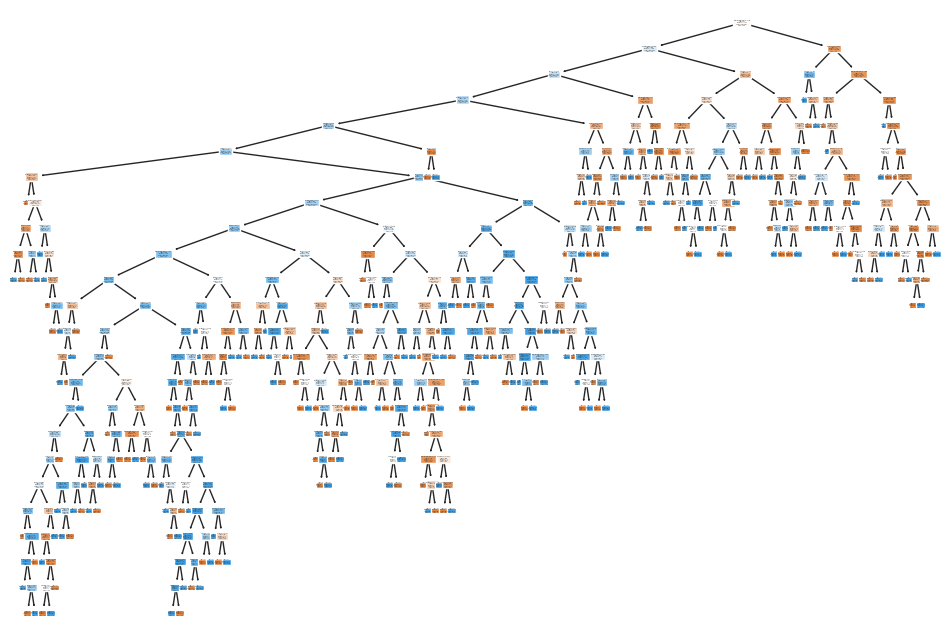

In [25]:
import numpy as np

# Extracting features and target variable
X = norm_undersampled[columns_targets]
Y = norm_undersampled['popularity']

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2)

# Initialize the classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2, min_samples_leaf=1,
                                  ccp_alpha=0.0, random_state=3870)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate the cost complexity pruning path
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)

# Use the ccp_path to find the best value of cp to use to prune the full tree
best_cp_index = np.argmin(ccp_path['ccp_alphas'])
best_cp = ccp_path['ccp_alphas'][best_cp_index]

# Use the best value of cp to prune the full tree
pruned_clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=2,
                                         min_samples_leaf=1,
                                         ccp_alpha=best_cp, random_state=3870)
pruned_clf.fit(X_train, y_train)

# Evaluate the pruned classifier on the testing data
pruned_accuracy = pruned_clf.score(X_test, y_test)
print("Pruned Accuracy:", pruned_accuracy)

# Print the best value of cp
print("Best value of cp:", best_cp)

# Prune the tree
popularity_prune = tree.DecisionTreeClassifier(ccp_alpha=best_cp)
popularity_prune.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(popularity_prune, filled=True, feature_names=X_train.columns,
               class_names=popularity_prune.classes_.astype(str))
plt.show()

pred_decision_tree = popularity_prune.predict_proba(X_test)[:, 0]

tpr_decision_tree, fpr_decision_tree, thresholds = roc_curve(y_test, pred_decision_tree)

## Measuring Difference in Machine Learning Model Accuracies

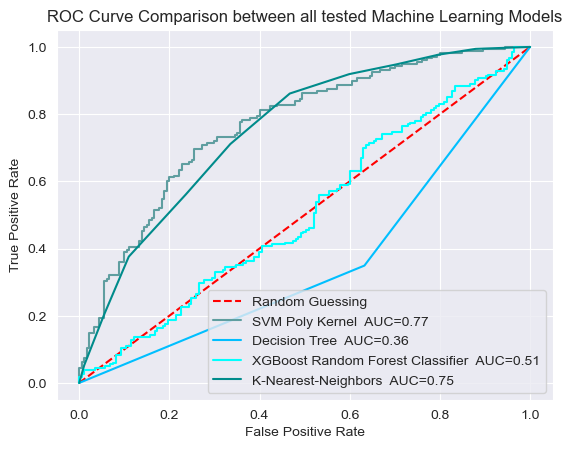

P-value for SVM and KNN: RanksumsResult(statistic=1.429053565415588, pvalue=0.15298883827097326) > 0.05, therefore there is no significant difference in accuracy between Polynomial-kernel SVM and KNN models.
P-value for SVM and XGBoost: RanksumsResult(statistic=2.2734943086157084, pvalue=0.0229964087115048) < 0.05, therefore there is a significant difference between the accuracy values for Polynomial-kernel SVM and XGBoost Random Forest Model.
Alpha: 0.05
P-value for SVM and KNN: RanksumsResult(statistic=1.429053565415588, pvalue=0.15298883827097326)
P-value for SVM and XGBoost: RanksumsResult(statistic=2.2734943086157084, pvalue=0.0229964087115048)


In [26]:
## Comparing effectivity of different classifiers
# We can collect each of the accuracy metrics and plot them on a scatterplot, along with
# an expected ROC curve value and an identity line. This will show how each of them
# matches in terms or effectivity of the positive class, and the overall accuracy of the
# model if we use AUC.

# ROC Curve: TP vs FP
# Collecting accuracy statistics from each sample
# svm_tp = poly_tp
# svm_fp = poly_fp
# svm_tn = poly_tn
# svm_fn = poly_fn
# decision_tree_tn, decision_tree_fp, decision_tree_fn, decision_tree_tp = decision_tree_matrix.ravel()
# rfc_tn, rfc_fp, rfc_fn, rfc_tp = confusion_matrix(y_test, y_pred_xgboost).ravel()
# knn_tn, knn_fp, knn_fn, knn_tp = cm.ravel()

# Resetting X and y splits
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Finding probabilities of SVM classifier
svm_classifier_poly = SVC(kernel='poly', degree=3, C=1, probability=True)
svm_classifier_poly.fit(X_train, y_train)
svm_pred = svm_classifier_poly.decision_function(X_test)
tpr_svm, fpr_svm, _ = roc_curve(y_test, svm_pred)

# Note: The accuracy difference between RBF-kernel and Polynomial-kernel for SVM is not statistically significant,
# therefore we are only analyzing the accuracy of the Polynomial kernel SVC for our model.

# Find Area Under the Curve values for each of the classifiers
auc_svm = auc(tpr_svm, fpr_svm)
auc_decision_tree = auc(tpr_decision_tree, fpr_decision_tree)
auc_rfc = auc(tpr_rfc, fpr_rfc)
auc_knn = auc(tpr_knn, fpr_knn)

# Plotting Layered ROC curves for each of the machine learning models, with Area Under the Curve Metric for each
plt.plot([0, 1], [0, 1], '--', color='red', label='Random Guessing')
plt.plot(tpr_svm, fpr_svm, color='cadetblue', label=f'SVM Poly Kernel  AUC={round(auc_svm, 2)}')
plt.plot(tpr_decision_tree, fpr_decision_tree, color='deepskyblue', label=f'Decision Tree  AUC={round(auc_decision_tree, 2)}')
plt.plot(tpr_rfc, fpr_rfc, color='aqua', label=f'XGBoost Random Forest Classifier  AUC={round(auc_rfc, 2)}')
plt.plot(tpr_knn, fpr_knn, color='darkcyan', label=f'K-Nearest-Neighbors  AUC={round(auc_knn, 2)}')
plt.title("ROC Curve Comparison between all tested Machine Learning Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# It appears that the KNN and Polynomial-kernel SVM models are close to being the most accurate. Is there
# statistical significance in the accuracy values of each of these models?
# Hypothesis Test
Pvalue1 = ranksums(y_pred_poly, y_pred_knn)
Pvalue2 = ranksums(y_pred_poly, y_pred_xgboost)

print(f"P-value for SVM and KNN: {Pvalue1} > 0.05, therefore there is no significant difference in accuracy between Polynomial-kernel SVM and KNN models.")
print(f"P-value for SVM and XGBoost: {Pvalue2} < 0.05, therefore there is a significant difference between the accuracy values for Polynomial-kernel SVM and XGBoost Random Forest Model.")

Pvalue12 = ranksums(auc_svm, auc_knn)
Pvalue22 = ranksums(auc_svm, auc_rfc)

print("Alpha: 0.05")
print(f"P-value for SVM and KNN: {Pvalue1}")
print(f"P-value for SVM and XGBoost: {Pvalue2}")

This ROC Curve shows the differences in precision between the different machine learning models at predicting popularity of Spotify songs. There is a clear distinction between the precision values of Polynomial-kernel SVM and the K-Nearest-Neighbor classifiers when compared to the XGBoost Random Forest Classifier and the Decision Tree models. 

Support Vector Classifiers are very effective at binary classification for small datasets